In [1]:
ad.data <- read.csv("data.csv", stringsAsFactors=F)

# Project 1
by Jaime Vargas and Daryna Kondratiuk 
___

<a id="contents"></a>
<div>
    <h2>
    Table of Contents
    </h2>
    <br>
    1. <a href='#intro'>Objective of the Proposed Research</a><br>
    2. <a href='#dataExp'>Data Exploration</a><br>
    3. <a href='#dataClean'>Data Cleaning</a><br>
    4. <a href='#adapt'>Adaption</a><br>
    5. <a href='#visual'>Descriptive Visualization</a><br>
    6. <a href='#var'>Response Variable</a><br>
    7. <a href='#correl'>Explore Correlations</a><br>
    8. <a href='#slr'>Simple Linear Regression</a><br>
    9. <a href='#mlr'>Multiple Linear Regression</a><br>
   10. <a href='#report'>Project Report</a><br>
</div>

<a id="intro"></a>
<div>
    <h2>
        Objective of the Proposed Research 
    </h2> 
</div>

Predicting the future is an ability that many companies wish they had. With linear regression, it is possible to predict certain outcomes if you posses the right dataset. In this analysis, we will be analyzing Uptown Digital's(™) ad campaign data from FaceBook's ad manager to determine an equation that will allow us to predict user engagement and conversion rates. 

We will explore the data first, to get a clear idea of what information we have and how important it is. After we perform these simple observations we will be cleaning the data, and removing or adding columns to enrich the dataset. Once the data is cleaned, we will be ready to start our analysis and linear regression calculations.



Once we have a significant and accurate model and have examined the results thoroughly, we will prepare a summary for the Chief Marketing Officer to provide him will all the information he will need to make better decisions for the company's targeted ads. We will include our own recommendation based on a predictive model and include charts and tables to better display the results in our report. Our insights will serve to better inform the stakeholders of how they should be managing their ad campaigns.

<a href="#contents">Table of Contents</a>

<a id="dataExp"></a>
<div>
    <h2>
        Data Exploration 
    </h2> 
</div>

To start off, I will perform some basic data exploration. It's always a good idea to take a look at the first 5 rows of your data, to get a small understanding of what you're dealing with.

In [2]:
head(ad.data, n=5)

ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350,1,1.43,2,1
708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861,2,1.82,2,0
708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693,0,0.00,1,0
708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259,1,1.25,1,0
708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133,1,1.29,1,1


In [3]:
summary(ad.data)

     ad_id         reporting_start    reporting_end       campaign_id  
 Min.   : 708746   Length:1143        Length:1143        Min.   : 916  
 1st Qu.: 777632   Class :character   Class :character   1st Qu.: 936  
 Median :1121185   Mode  :character   Mode  :character   Median : 936  
 Mean   : 987261                                         Mean   :1012  
 3rd Qu.:1121804                                         3rd Qu.:1178  
 Max.   :1314415                                         Max.   :1178  
                                                         NA's   :382   
 fb_campaign_id       age               gender            interest1     
 Min.   :103916   Length:1143        Length:1143        Min.   :  2.00  
 1st Qu.:110982   Class :character   Class :character   1st Qu.: 16.00  
 Median :116341   Mode  :character   Mode  :character   Median : 25.00  
 Mean   :123915                                         Mean   : 32.77  
 3rd Qu.:144549                                         3rd

In [4]:
str(ad.data)

'data.frame':	1143 obs. of  15 variables:
 $ ad_id              : int  708746 708749 708771 708815 708818 708820 708889 708895 708953 708958 ...
 $ reporting_start    : chr  "17/08/2017" "17/08/2017" "17/08/2017" "30/08/2017" ...
 $ reporting_end      : chr  "17/08/2017" "17/08/2017" "17/08/2017" "30/08/2017" ...
 $ campaign_id        : int  916 916 916 916 916 916 916 916 916 916 ...
 $ fb_campaign_id     : int  103916 103917 103920 103928 103928 103929 103940 103941 103951 103952 ...
 $ age                : chr  "30-34" "30-34" "30-34" "30-34" ...
 $ gender             : chr  "M" "M" "M" "M" ...
 $ interest1          : int  15 16 20 28 28 29 15 16 27 28 ...
 $ interest2          : int  17 19 25 32 33 30 16 20 31 32 ...
 $ interest3          : int  17 21 22 32 32 30 17 18 31 31 ...
 $ impressions        : int  7350 17861 693 4259 4133 1915 15615 10951 2355 9502 ...
 $ clicks             : int  1 2 0 1 1 0 3 1 1 3 ...
 $ spent              : num  1.43 1.82 0 1.25 1.29 ...
 $ total_conv

I see from this information that the age is categorical instead of numarical, meaning that it's most likely a range. I can also see the we have 1143 ads total and that ads cost around 17 dollars on average.

I'm concerned about there being 0's in the spent column, as ads that have no money charged shouldn't have any clicks or results, and since we will be planning to add a cost per click and conversion per click calculated column, it may throw off the results. I'm also a bit concerned about the NAs, so we'll do a quick check on that.

In [5]:
ad.data.zero.spent <- ad.data[ad.data$spent == 0,]

In [6]:
nrow(ad.data.zero.spent)

[1] 207

There are 207 rows were the ad didn't incur any costs from facebook. This means that no one clicked on an ad. If the dataset is consistent, then there should be 207 rows were there were zero clicks. This is because if the company was not charged for the ad, then that means they never launched that specific ad and thus that ad never got any clicks.

In [7]:
ad.data.zero.clicks <- ad.data[ad.data$clicks == 0,]

In [8]:
nrow(ad.data.zero.clicks)

[1] 207

In [9]:
identical(ad.data.zero.spent[,c("ad_id")],ad.data.zero.clicks[,c("ad_id")])

[1] TRUE

Ok, the data seems consistent as both the rows that have zero money spent and zero clicks are consistent. I will now chekc the NA's.

In [10]:
colSums(is.na(ad.data)) 

ad_id     reporting_start       reporting_end         campaign_id 
                  0                   0                   0                 382 
     fb_campaign_id                 age              gender           interest1 
                382                   0                   0                   0 
          interest2           interest3         impressions              clicks 
                  0                   0                   0                   0 
              spent    total_conversion approved_conversion 
                  0                   0                   0

We have some NA's in campaign_id and fb_campaign_id. We assume that this is because some ads either weren't launched through facebook and didn't receive and official ID or weren't catologued correctly with the company.

Lastly, I want to see how many unique reporting dates we have

In [11]:
head(unique(ad.data[, "reporting_start"]), n=10)

[1] "17/08/2017" "30/08/2017" "29/08/2017" "18/08/2017" "19/08/2017"
 [6] "27/08/2017" "26/08/2017" "25/08/2017" "28/08/2017" "20/08/2017"

In [12]:
head(unique(ad.data[, "reporting_end"]), n=10)

[1] "17/08/2017" "30/08/2017" "29/08/2017" "18/08/2017" "19/08/2017"
 [6] "27/08/2017" "26/08/2017" "25/08/2017" "28/08/2017" "20/08/2017"

I see that all the ads we're evaluating were launched in the span of two weeks.

I will be describing the columns here:
ad_id: The ID of the specific ad<br>
reporting_start: The start of the reporting period(2 week period)<br><br>
reporting_end:The end of the reporting period(2 week period)<br>
campaign_id: The ID of the ad campaign as categorized by the company<br>
fb_campaign_id: The ID of the ad campaign as categorized by FaceBook.<br>
age: Age Range of the person (categorical data)<br>
gender: Gender(Male or Female) of the person who saw the ad<br>
interest: Code representing the category of which the person is interested in (categorical)<br>
Impressions: Number of times teh ad was shown<br>
Clicks: Number of Clicks From teh add<br>
Spent: Amount paid by the company to FaceBook to show the ad<br>
Total conversion: Total number of people who enquired about the product after seeing the ad<br>
Approved conversioin: Total number of people who bought the product after seeing teh ad.<br>

<a href="#contents">Table of Contents</a>

<a id="dataClean"></a>
<div>
    <h2>
        Data Cleaning
    </h2> 
</div>

Based on the observations made when exploring the data, I can see that I won't be needing the date columns or the campaign ID columns. The dates that the ads were launched are irrelevant in our research, as they were all from a couple of weeks in August, 2017. The campaign ID's are not relevant to our study as we are focusing on individual ads rather than campaigns. On of that, there are NA values in the campaign ID's.

In [13]:
colnames(ad.data)

[1] "ad_id"               "reporting_start"     "reporting_end"      
 [4] "campaign_id"         "fb_campaign_id"      "age"                
 [7] "gender"              "interest1"           "interest2"          
[10] "interest3"           "impressions"         "clicks"             
[13] "spent"               "total_conversion"    "approved_conversion"

In [14]:
ad.data.clean <- ad.data[, c("ad_id", "age", "gender", "interest1", 
                      "interest2", "interest3", "impressions", "clicks", "spent", "total_conversion", "approved_conversion")]

We'll perform a sanity check to make sure the correct columns remain in the dataset

In [15]:
colnames(ad.data.clean)

[1] "ad_id"               "age"                 "gender"             
 [4] "interest1"           "interest2"           "interest3"          
 [7] "impressions"         "clicks"              "spent"              
[10] "total_conversion"    "approved_conversion"

In [16]:
head(ad.data.clean, n=5)

ad_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
708746,30-34,M,15,17,17,7350,1,1.43,2,1
708749,30-34,M,16,19,21,17861,2,1.82,2,0
708771,30-34,M,20,25,22,693,0,0.00,1,0
708815,30-34,M,28,32,32,4259,1,1.25,1,0
708818,30-34,M,28,33,32,4133,1,1.29,1,1


This seems good. I will now remove the rows that have no spending/no clicks, as they will mess up our calculated columns and the linear regression we will perform.

In [17]:
ad.data.cleaner <- ad.data.clean[!(ad.data.clean$spent==0),]

In [18]:
summary(ad.data.cleaner)

     ad_id             age               gender            interest1     
 Min.   : 708746   Length:936         Length:936         Min.   :  2.00  
 1st Qu.: 780322   Class :character   Class :character   1st Qu.: 16.00  
 Median :1121376   Mode  :character   Mode  :character   Median : 25.00  
 Mean   :1023657                                         Mean   : 34.21  
 3rd Qu.:1121902                                         3rd Qu.: 31.00  
 Max.   :1314415                                         Max.   :114.00  
   interest2        interest3       impressions          clicks      
 Min.   :  3.00   Min.   :  3.00   Min.   :    944   Min.   :  1.00  
 1st Qu.: 21.00   1st Qu.: 21.00   1st Qu.:  19071   1st Qu.:  3.00  
 Median : 28.00   Median : 28.00   Median :  98336   Median : 16.00  
 Mean   : 37.68   Mean   : 37.68   Mean   : 227506   Mean   : 40.77  
 3rd Qu.: 35.00   3rd Qu.: 35.00   3rd Qu.: 282967   3rd Qu.: 50.00  
 Max.   :118.00   Max.   :120.00   Max.   :3052003   Max.   :4

In [19]:
str(ad.data.cleaner)

'data.frame':	936 obs. of  11 variables:
 $ ad_id              : int  708746 708749 708815 708818 708889 708895 708953 708958 709059 709115 ...
 $ age                : chr  "30-34" "30-34" "30-34" "30-34" ...
 $ gender             : chr  "M" "M" "M" "M" ...
 $ interest1          : int  15 16 28 28 15 16 27 28 20 30 ...
 $ interest2          : int  17 19 32 33 16 20 31 32 26 34 ...
 $ interest3          : int  17 21 32 32 17 18 31 31 23 31 ...
 $ impressions        : int  7350 17861 4259 4133 15615 10951 2355 9502 14669 2305 ...
 $ clicks             : int  1 2 1 1 3 1 1 3 7 1 ...
 $ spent              : num  1.43 1.82 1.25 1.29 4.77 ...
 $ total_conversion   : int  2 2 1 1 1 1 1 1 1 1 ...
 $ approved_conversion: int  1 0 0 1 0 1 0 0 1 0 ...


So only 936 rows remain, which is consistent since we removed the 207 rows that had zero spending. Our dataset, ad.data.cleaner will be the one we will use for the calculated columns and linear regression.

<a href="#contents">Table of Contents</a>

<a id="adapt"></a>
<div>
    <h2>
        Adaptation
    </h2> 
</div>

We will add four calculated columns for now. Cost per Click, Cost per Conversion and Cost per 1000 Impressions and Conversion Rate. These four columns will the primary values we'll try to predict with our linear regression. The formular are below<br>
$CostPerClick = Spent / Clicks$<br>
$CostPerConversion = Spent  / TotalConversion$<br>
$CostPerImpressions = (Spent  / Impressions) * 1000$<br>
$ConversionRate = (TotalConversion  / (Clicks + (Impressions / 1000)) * 100$

In [20]:
ad.data.cleaner$CostPerClick <- ad.data.cleaner$spent / ad.data.cleaner$clicks
ad.data.cleaner$CostPerConversion <- ad.data.cleaner$spent / ad.data.cleaner$total_conversion
ad.data.cleaner$CostPerImpressions <- ad.data.cleaner$spent / ad.data.cleaner$impressions * 1000
ad.data.cleaner$CostPerImpressions <- round(ad.data.cleaner$CostPerImpressions,2)
ad.data.cleaner$Conv_rate <- ad.data.cleaner$total_conversion / (ad.data.cleaner$clicks + (ad.data.cleaner$impressions / 1000)) * 100
ad.data.cleaner$Conv_rate <- round(ad.data.cleaner$Conv_rate,2)

In [21]:
head(ad.data.cleaner)

,ad_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CostPerClick,CostPerConversion,CostPerImpressions,Conv_rate
1,708746,30-34,M,15,17,17,7350,1,1.43,2,1,1.43,0.715,0.19,23.95
2,708749,30-34,M,16,19,21,17861,2,1.82,2,0,0.91,0.910,0.10,10.07
4,708815,30-34,M,28,32,32,4259,1,1.25,1,0,1.25,1.250,0.29,19.02
5,708818,30-34,M,28,33,32,4133,1,1.29,1,1,1.29,1.290,0.31,19.48
7,708889,30-34,M,15,16,17,15615,3,4.77,1,0,1.59,4.770,0.31,5.37
8,708895,30-34,M,16,20,18,10951,1,1.27,1,1,1.27,1.270,0.12,8.37


These columns seem like they're enough to perform a deeper analysis and a linear regression to predict how to increase revenue.

<a href="#contents">Table of Contents</a>

<a id="visual"></a>
<div>
    <h2>
        Descriptive Visualization
    </h2> 
</div>

<a href="#contents">Table of Contents</a>

<a id="var"></a>
<div>
    <h2>
        Response variable
    </h2> 
</div>

Conv_rate = total_conversion / (clicks + (impressions / 1000)) * 100

Conversion rate is an important metric for this analysis because by optimizing a conversion rate company can increase revenue per visitor, acquire more customers, and grow a business.

<a href="#contents">Table of Contents</a>

<a id="correl"></a>
<div>
    <h2>
        Explore Correlations
    </h2> 
</div>

In [22]:
install.packages("psych")
library(psych)

## Some NaN in correlation values !

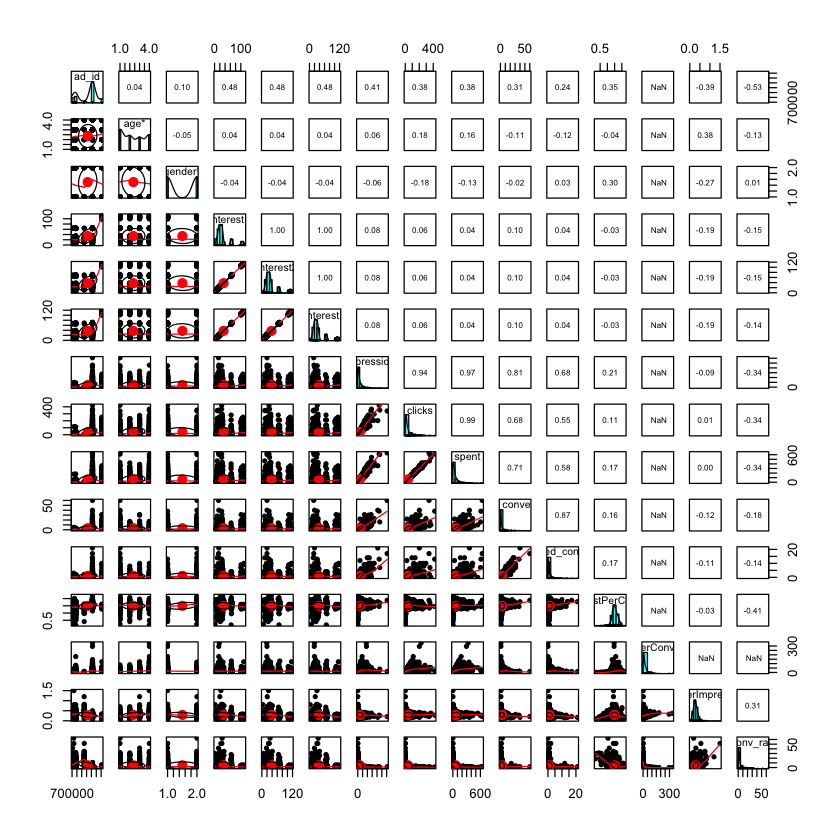

In [23]:
pairs.panels(ad.data.cleaner)

<a href="#contents">Table of Contents</a>

<a id="slr"></a>
<div>
    <h2>
        Simple Linear Regression
    </h2> 
</div>

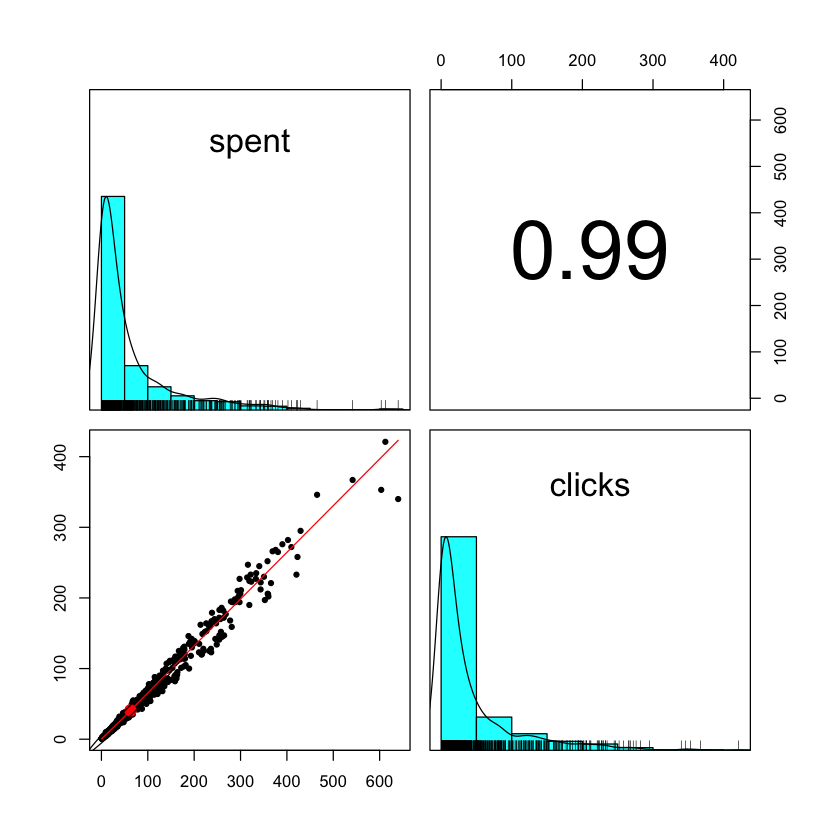

In [24]:
pairs.panels(ad.data.cleaner[,c("spent", "clicks")])

In [25]:
m1 <- lm(spent ~ clicks, data = ad.data.cleaner)
summary(m1)


Call:
lm(formula = spent ~ clicks, data = ad.data.cleaner)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.051  -2.255  -1.045   0.698 123.908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.94636    0.45036   2.101   0.0359 *  
clicks       1.51499    0.00618 245.146   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.42 on 934 degrees of freedom
Multiple R-squared:  0.9847,	Adjusted R-squared:  0.9847 
F-statistic: 6.01e+04 on 1 and 934 DF,  p-value: < 2.2e-16


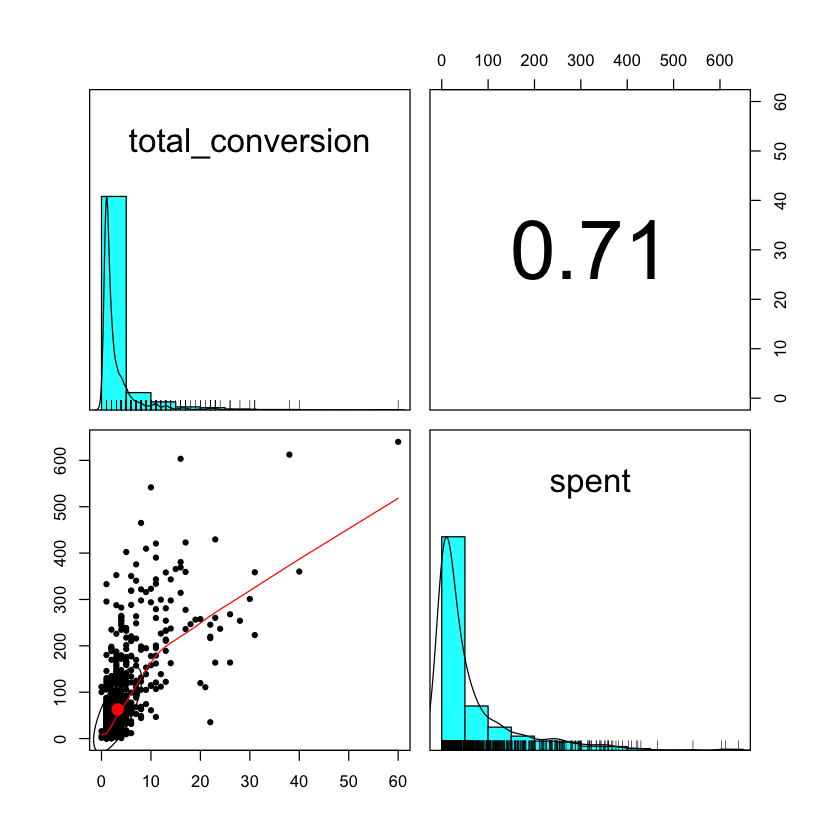

In [26]:
pairs.panels(ad.data.cleaner[,c("total_conversion", "spent")])

In [27]:
m2 <- lm(total_conversion ~ spent, data = ad.data.cleaner)
summary(m2)


Call:
lm(formula = total_conversion ~ spent, data = ad.data.cleaner)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.415  -0.908  -0.079   0.323  35.053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.904326   0.134822   6.708 3.42e-11 ***
spent       0.037570   0.001209  31.076  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.411 on 934 degrees of freedom
Multiple R-squared:  0.5084,	Adjusted R-squared:  0.5078 
F-statistic: 965.7 on 1 and 934 DF,  p-value: < 2.2e-16


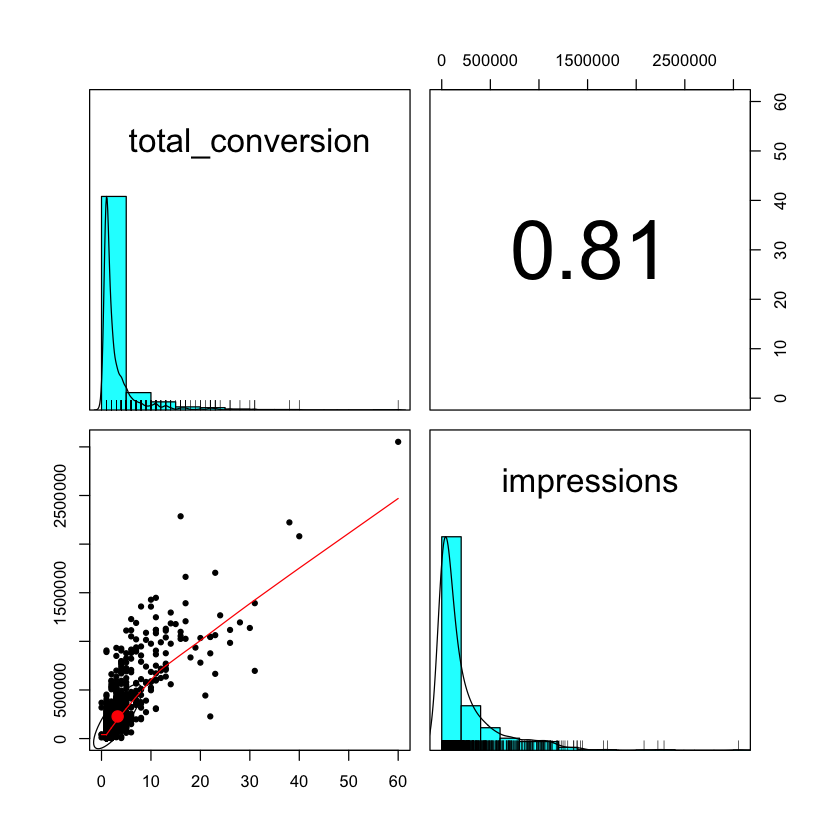

In [28]:
pairs.panels(ad.data.cleaner[,c("total_conversion", "impressions")])

In [29]:
m3 <- lm(total_conversion ~ impressions, data = ad.data.cleaner)
summary(m3)


Call:
lm(formula = total_conversion ~ impressions, data = ad.data.cleaner)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5448  -0.7775   0.1637   0.3940  23.4223 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.771e-01  1.142e-01   5.055 5.17e-07 ***
impressions 1.180e-05  2.837e-07  41.580  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.881 on 934 degrees of freedom
Multiple R-squared:  0.6493,	Adjusted R-squared:  0.6489 
F-statistic:  1729 on 1 and 934 DF,  p-value: < 2.2e-16


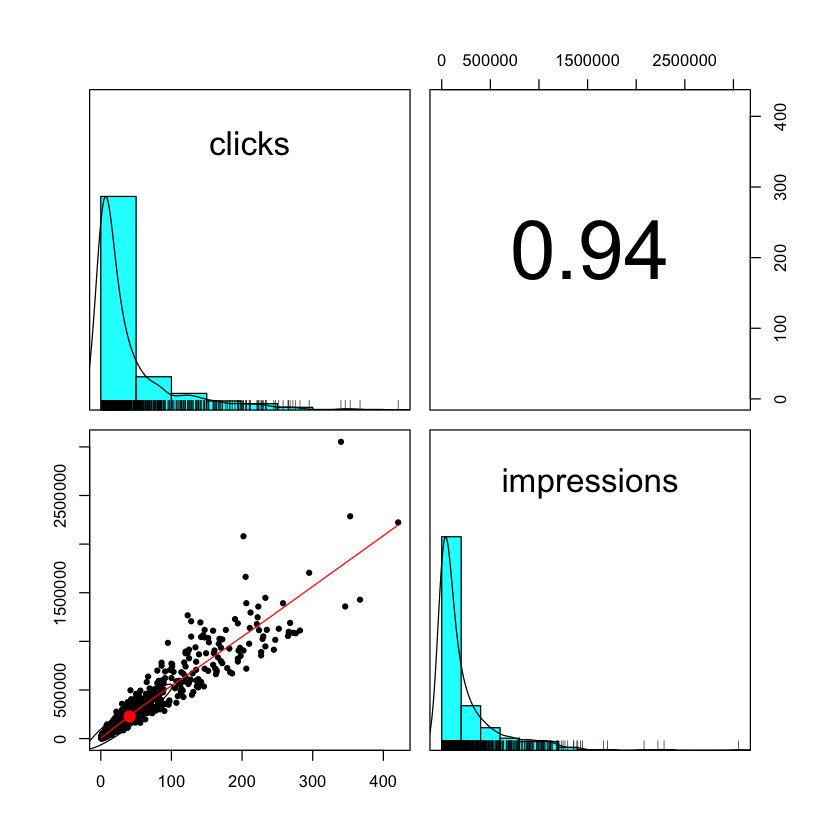

In [30]:
pairs.panels(ad.data.cleaner[,c("clicks", "impressions")])

In [31]:
m4 <- lm(clicks ~ impressions, data = ad.data.cleaner)
summary(m4)


Call:
lm(formula = clicks ~ impressions, data = ad.data.cleaner)

Residuals:
     Min       1Q   Median       3Q      Max 
-186.099   -5.392   -1.422    2.070  119.876 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.683e+00  7.888e-01   2.133   0.0331 *  
impressions 1.718e-04  1.960e-06  87.654   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.91 on 934 degrees of freedom
Multiple R-squared:  0.8916,	Adjusted R-squared:  0.8915 
F-statistic:  7683 on 1 and 934 DF,  p-value: < 2.2e-16


<a href="#contents">Table of Contents</a>

<a id="mlr"></a>
<div>
    <h2>
        Multiple Linear Regression
    </h2> 
</div>

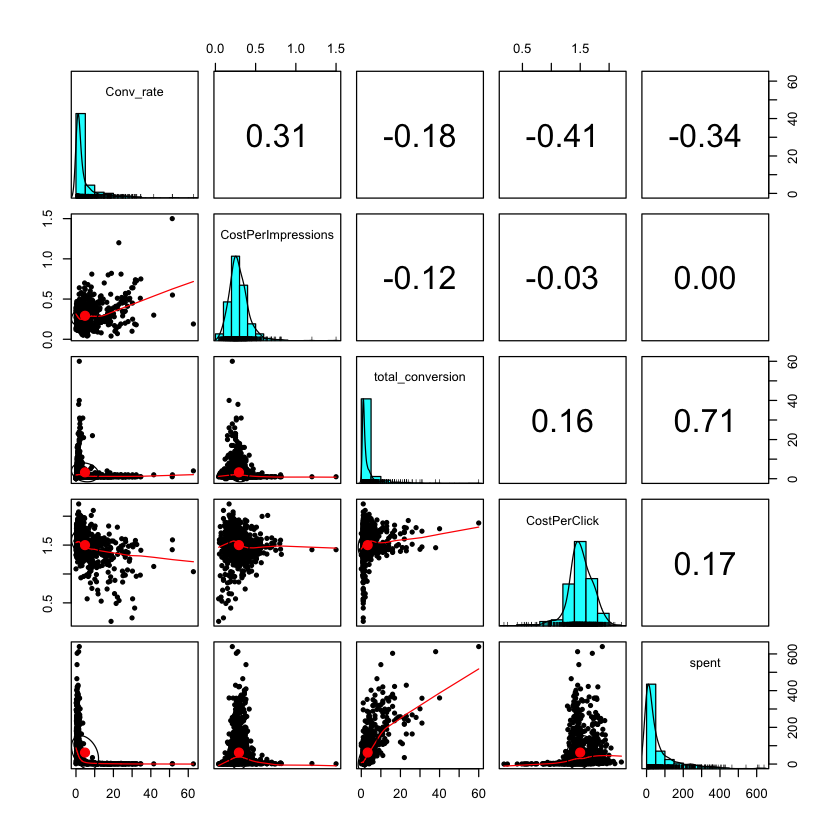

In [32]:
pairs.panels(ad.data.cleaner[,c("Conv_rate", "CostPerImpressions", "total_conversion", "CostPerClick", "spent")])

In [33]:
a <- lm(Conv_rate ~ CostPerImpressions + total_conversion + CostPerClick + spent, data = ad.data.cleaner)
summary(a)


Call:
lm(formula = Conv_rate ~ CostPerImpressions + total_conversion + 
    CostPerClick + spent, data = ad.data.cleaner)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.191  -3.464  -1.240   1.894  52.146 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         17.300440   1.321261  13.094  < 2e-16 ***
CostPerImpressions  18.609462   1.510419  12.321  < 2e-16 ***
total_conversion     0.372530   0.056412   6.604 6.73e-11 ***
CostPerClick       -11.234900   0.824977 -13.618  < 2e-16 ***
spent               -0.036287   0.002954 -12.284  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.782 on 931 degrees of freedom
Multiple R-squared:  0.3629,	Adjusted R-squared:  0.3602 
F-statistic: 132.6 on 4 and 931 DF,  p-value: < 2.2e-16


<a href="#contents">Table of Contents</a>

<a id="report"></a>
<div>
    <h2>
        Project Report
    </h2> 
</div>